In [ ]:
# 구글 드라이브 연동
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터 읽고 상위 5개 데이터 형태 살펴보기
df = pd.read_csv("/content/drive/MyDrive/kaggle/heart-disease/framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# 데이터 크기 보기
df.shape

(4238, 16)

In [ ]:
#학습 목적으로 범주화 해둔 column 날리기
df.drop("education",axis=1,inplace=True)
df.head(2)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0


In [ ]:
#결측치 확인하기
df.isnull().sum()

# 추후 결측치 제거 필요

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

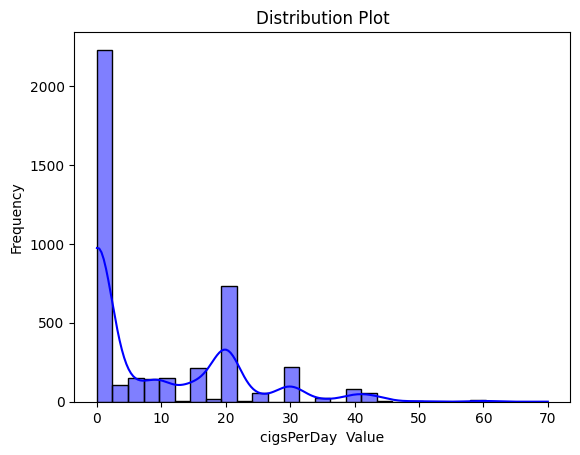

In [ ]:
# 결측치 처리 방식을 결정하기 위한 정보
# 하루 평균 담배 개비 수 도수 그래프
import seaborn as sns
import matplotlib.pyplot as plt

data = df.cigsPerDay
sns.histplot(data, kde=True, color='blue')
plt.xlabel('cigsPerDay  Value')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

plt.show()

In [ ]:
# 하루 평균 담배 개비 수 중간값
cigs_per_day = df['cigsPerDay']
filtered_cigs_per_day = cigs_per_day[cigs_per_day > 0]
median_value_cigsPerDay = filtered_cigs_per_day.median()

print("Median:", median_value_cigsPerDay)

Median: 20.0


In [ ]:
df.loc[df['currentSmoker'] == 1, 'cigsPerDay'] = df.loc[df['currentSmoker'] == 1, 'cigsPerDay'].fillna(median_value_cigsPerDay)
df.loc[df['currentSmoker'] == 0, 'cigsPerDay'] = df.loc[df['currentSmoker'] == 0, 'cigsPerDay'].fillna(0)

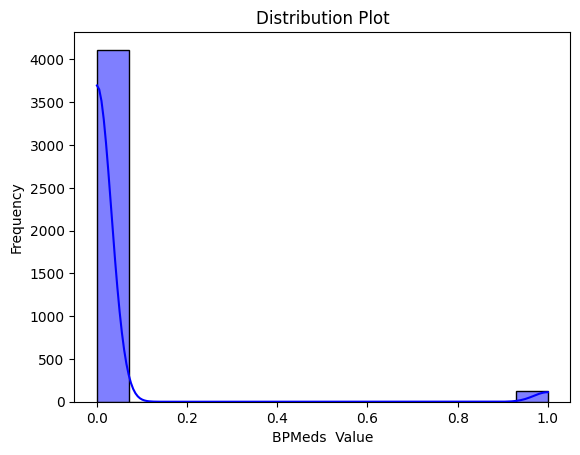

In [ ]:
# 결측치 처리 방식을 결정하기 위한 정보
# 혈압약 복용여부 도수 그래프
data = df.BPMeds

sns.histplot(data, kde=True, color='blue')

plt.xlabel('BPMeds  Value')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

plt.show()

In [ ]:
# 값이 0 , 1 인 명목형자료
# 0인 값이 대부분이므로 결측치를 0으로 채운다.
df["BPMeds"].fillna(0,inplace=True)

In [ ]:
# 중간 점검
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

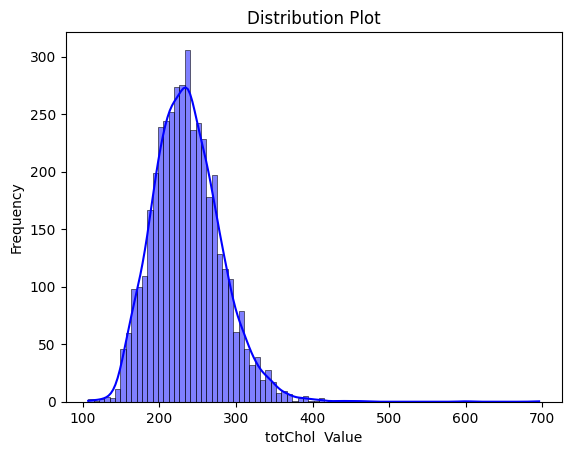

In [ ]:
# 결측치 처리 방식을 결정하기 위한 정보
# 총 콜레스테롤 수치
data = df.totChol

sns.histplot(data, kde=True, color='blue')

plt.xlabel('totChol  Value')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

plt.show()

In [ ]:
# 종 모양의 분포를 가짐
# 평균 구해보기
mean_value = df['totChol'].mean()

print("Mean:", mean_value)

Mean: 236.72158548233045


In [ ]:
# 평균값을 가정하고 결측치를 채움
df["totChol"].fillna(mean_value,inplace=True)

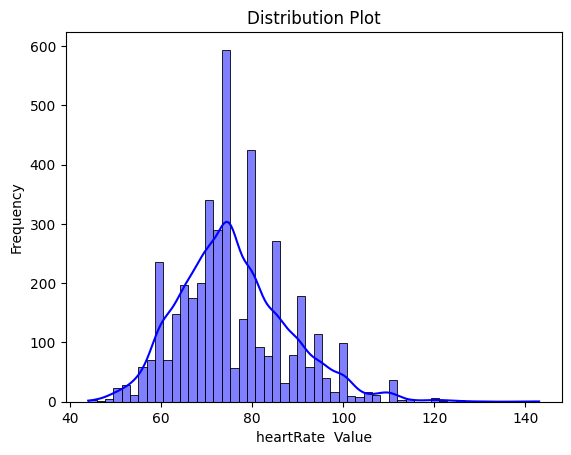

In [ ]:
# 결측치 처리 방식을 결정하기 위한 정보
# 심박수
data = df.heartRate

sns.histplot(data, kde=True, color='blue')

plt.xlabel('heartRate  Value')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

plt.show()

In [ ]:
# 평균 구해보기
mean_value = df['heartRate'].mean()
print("Mean:", mean_value)

Mean: 75.87892376681614


In [ ]:
# 평균값을 가정하고 결측치를 채움
df["heartRate"].fillna(mean_value,inplace=True)

In [ ]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                 19
heartRate            0
glucose            388
TenYearCHD           0
dtype: int64

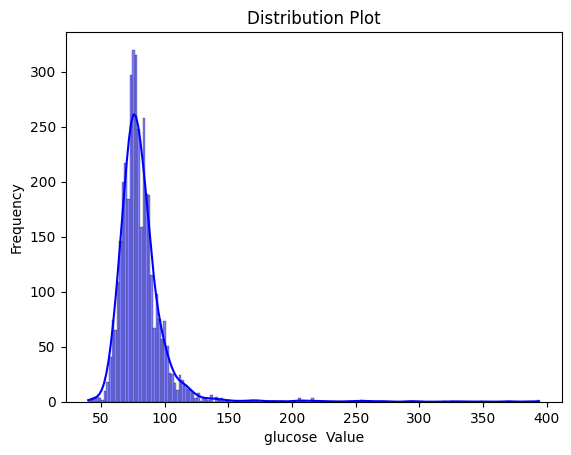

In [ ]:
# 결측치 처리 방식을 결정하기 위한 정보
# 혈당 수치
data = df.glucose

sns.histplot(data, kde=True, color='blue')

plt.xlabel('glucose  Value')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

plt.show()

# 결측치가 있는 행이 388개라 너무 많음. 모두 평균으로 스케일링 하기에는 영향이 너무 큼
# 평균을 가정하지 않고 추후 결측치가 있는 행 제거

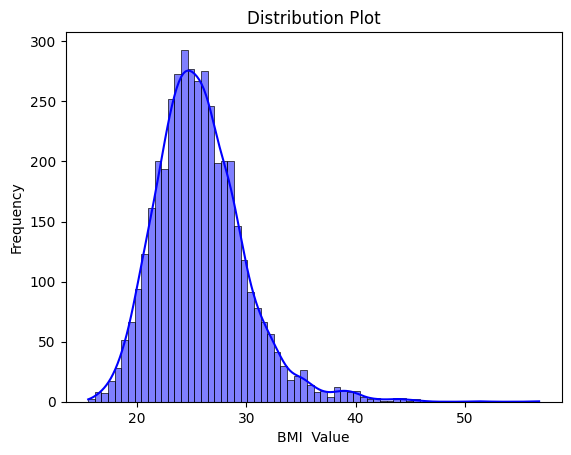

In [ ]:
# 결측치 처리 방식을 결정하기 위한 정보
# 체질량 지수
data = df.BMI

sns.histplot(data, kde=True, color='blue')

plt.xlabel('BMI  Value')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

plt.show()


In [ ]:
# 종 모양의 분포를 가짐
# 평균 구해보기
mean_value = df['BMI'].mean()
print("Mean:", mean_value)

Mean: 25.80200758473572


In [ ]:
# 평균값을 가정하고 결측치를 채움
df["BMI"].fillna(mean_value,inplace=True)

In [ ]:
#혈당 수치 결측치 행제거
df_cleaned = df.dropna(subset=['glucose'])
df_cleaned.shape

(3850, 15)

In [ ]:
# 다중 공산성 파악을 위한 상관계수 구하기
correlation_matrix = df_cleaned.corr()
correlation_matrix

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.027330,0.204958,0.325587,-0.050767,-0.004135,0.000127,0.014535,-0.071943,-0.046269,0.052359,0.075529,-0.115842,0.006083,0.089897
age,-0.027330,1.000000,-0.212138,-0.190563,0.128109,0.064329,0.309869,0.109539,0.259760,0.391781,0.205713,0.135511,-0.006292,0.122256,0.235210
currentSmoker,0.204958,-0.212138,1.000000,0.774541,-0.051905,-0.038126,-0.107300,-0.049502,-0.048526,-0.135438,-0.114138,-0.161453,0.057390,-0.056826,0.018058
cigsPerDay,0.325587,-0.190563,0.774541,1.000000,-0.046682,-0.035260,-0.070266,-0.042629,-0.029049,-0.094709,-0.058124,-0.091531,0.070436,-0.057854,0.052270
BPMeds,-0.050767,0.128109,-0.051905,-0.046682,1.000000,0.102974,0.258959,0.055420,0.087946,0.264197,0.196164,0.103826,0.009685,0.050963,0.082343
prevalentStroke,-0.004135,0.064329,-0.038126,-0.035260,0.102974,1.000000,0.074703,0.006999,0.003764,0.063182,0.051484,0.029283,-0.022580,0.018431,0.066665
prevalentHyp,0.000127,0.309869,-0.107300,-0.070266,0.258959,0.074703,1.000000,0.083118,0.164983,0.699903,0.616502,0.301270,0.141624,0.086834,0.181841
diabetes,0.014535,0.109539,-0.049502,-0.042629,0.055420,0.006999,0.083118,1.000000,0.043016,0.112431,0.052363,0.095673,0.059500,0.617627,0.096241
totChol,-0.071943,0.259760,-0.048526,-0.029049,0.087946,0.003764,0.164983,0.043016,1.000000,0.212986,0.167117,0.112931,0.096079,0.046372,0.091523
sysBP,-0.046269,0.391781,-0.135438,-0.094709,0.264197,0.063182,0.699903,0.112431,0.212986,1.000000,0.784481,0.327599,0.180689,0.140621,0.222301


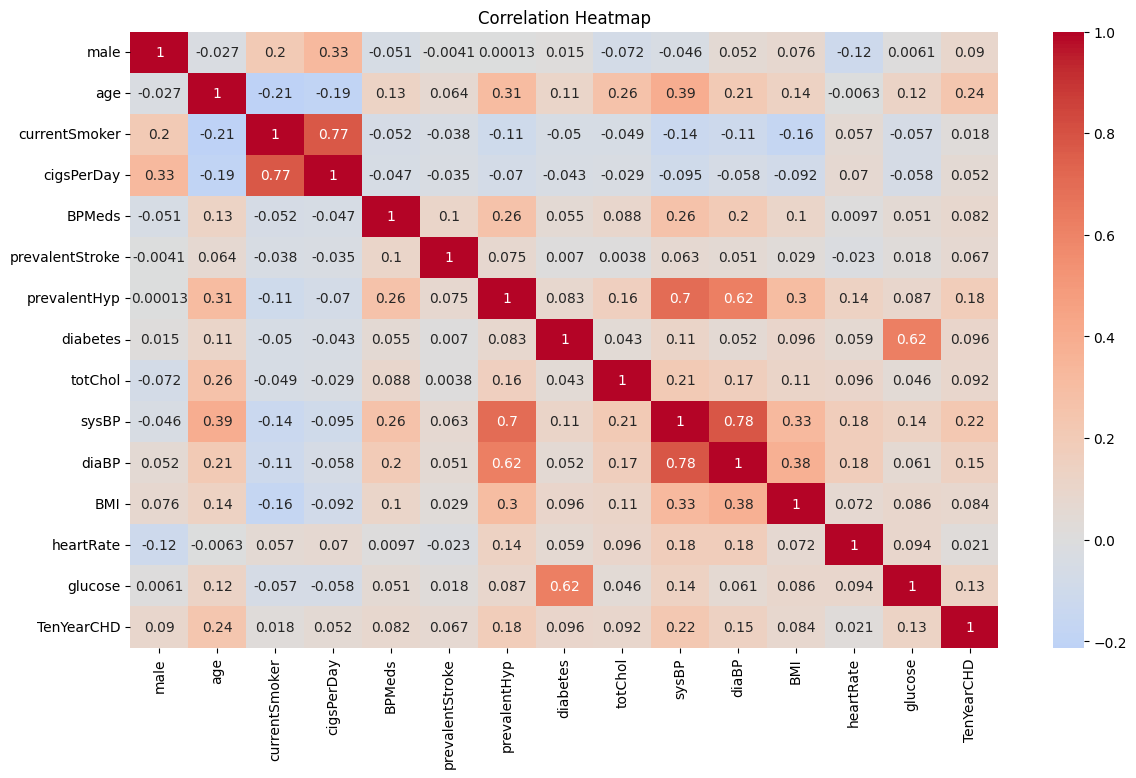

In [ ]:
# 열지도로 시각화
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#다중 공산성 상관관계가 0.6이 넘는 행 set
# cigsPerDay - currentSmoker (하루 평균 흡연량 - 현재 흡연 여부)
# sysBP - diaBP - prevalentHyp (수축기 혈압 - 이완기 혈압 - 고혈압 유병 여부)
# glucose - diabetes (혈당 수치 - 당뇨 여부)


# 하루평균 흡연량,  수축기 혈압, 혈당 수치를 선택, 이외의 열 제거
df_cleaned2 = df_cleaned.drop(columns=['currentSmoker','diaBP','prevalentHyp','diabetes'])

In [ ]:
# 데이터 전처리 이후 데이터 크기 확인
df_cleaned2.shape

(3850, 11)

In [ ]:
# 로지스틱 회귀를 통한 심근 경색 10년 발병 위험 여부 예측
# 심근 경색 10년 발병 위험 열을 제거후 y로 분리
# 분리후 데이터 확인
from sklearn.model_selection import train_test_split
X = df_cleaned2.drop(columns=["TenYearCHD"])
y=df_cleaned2.TenYearCHD
X

,male,age,cigsPerDay,BPMeds,prevalentStroke,totChol,sysBP,BMI,heartRate,glucose
0,1,39,0.0,0.0,0,195.0,106.0,26.97,80.0,77.0
1,0,46,0.0,0.0,0,250.0,121.0,28.73,95.0,76.0
2,1,48,20.0,0.0,0,245.0,127.5,25.34,75.0,70.0
3,0,61,30.0,0.0,0,225.0,150.0,28.58,65.0,103.0
4,0,46,23.0,0.0,0,285.0,130.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...
4232,1,68,0.0,0.0,0,176.0,168.0,23.14,60.0,79.0
4233,1,50,1.0,0.0,0,313.0,179.0,25.97,66.0,86.0
4234,1,51,43.0,0.0,0,207.0,126.5,19.71,65.0,68.0
4235,0,48,20.0,0.0,0,248.0,131.0,22.00,84.0,86.0


In [ ]:
# 훈련 집합, 테스트 집합 8:2 비율 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 각 변수들의 scale이 예측에 줄 영향을 줄이기 위해 Scaling
# 데이터를 평균을 0, 표준편차를 1로 변환하여 표준화된 데이터를 생성
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 로지스틱 회귀 피팅
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)


LogisticRegression()

In [ ]:

# 파라미터 설정을 안해서 모델의 기본 임계값은 0.5
# 0.5가 넘는다면 1 아니라면 0
y_pred = logreg.predict(X_test_scaled)

np.set_printoptions(threshold=np.inf)
y_pred2 = logreg.predict_proba(X_test_scaled)
print(y_pred2)

np.set_printoptions(threshold=10000)

[[0.81025271 0.18974729]
 [0.96683656 0.03316344]
 [0.9807635  0.0192365 ]
 [0.84932873 0.15067127]
 [0.81104958 0.18895042]
 [0.94037735 0.05962265]
 [0.94076091 0.05923909]
 [0.88596072 0.11403928]
 [0.66571502 0.33428498]
 [0.93756139 0.06243861]
 [0.7462395  0.2537605 ]
 [0.82454234 0.17545766]
 [0.77261836 0.22738164]
 [0.79521718 0.20478282]
 [0.84278427 0.15721573]
 [0.85026951 0.14973049]
 [0.90258596 0.09741404]
 [0.89417677 0.10582323]
 [0.7569588  0.2430412 ]
 [0.9062846  0.0937154 ]
 [0.90267186 0.09732814]
 [0.70734258 0.29265742]
 [0.72220968 0.27779032]
 [0.8217921  0.1782079 ]
 [0.73105482 0.26894518]
 [0.97334194 0.02665806]
 [0.90661165 0.09338835]
 [0.89782455 0.10217545]
 [0.85782105 0.14217895]
 [0.64280114 0.35719886]
 [0.76265703 0.23734297]
 [0.95202563 0.04797437]
 [0.92413587 0.07586413]
 [0.94716127 0.05283873]
 [0.90150139 0.09849861]
 [0.98341683 0.01658317]
 [0.90688207 0.09311793]
 [0.88740031 0.11259969]
 [0.91184303 0.08815697]
 [0.94270917 0.05729083]


In [ ]:
# 임계값에 따라 결과 예측
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
# 예측 후 예측 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8337662337662337


In [ ]:
# prcision = TP / TP + FP  (모델이 True라고 분류한 것 중에서 실제 True인 것의 비율)
# (TP = 실제 True인 정답을 True 로 예측 )
# (FP = 실제 False인 정답을 True로 예측 )
# 예시 : 병에 걸렸고 병에 걸렸다고 말할 확률 / 병에 안걸렸는데 병에 걸렸다고 할 확률 + 병에 걸렸고 병에 걸렸다고 말할 확률

# Recall = TP / TP + FN (실제 True인 것 중에서 모델이 True라고 예측한 것의 비율)
# (TP = 실제 True인 정답을 True 로 예측 )
# (FN = 실제 True인 정답을 False 로 예측 )
# 예시 : 병에 걸렸고 병에 걸렸다고 말할 확률 / 병에 걸렸는데 병에 안걸렸다고 말할 확률 + 병에 걸렸고 병에 걸렸다고 말할 확률

from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

print(classification_report(y_test,y_pred))

# 이러한 검진같은 경우 recall이 중요한 지표
# 병에 걸렸는데 안걸렸다고 말하면 대형 사고 (1 일때의 recall)
# 0 안걸림 1 걸림

# 병이 안걸리는 것에 대해 재현률이 0.98로 높음
# 가장 중요한 지표인 1 일때의 재현률이 0.07로 작음.
# 1에 대해 0.5와 비슷한데 그냥 찍었을때 맞출 확률이 0.5인것을 감안하면 유의한 모델이 아니다.

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       643
           1       0.47      0.07      0.12       127

    accuracy                           0.83       770
   macro avg       0.66      0.53      0.52       770
weighted avg       0.78      0.83      0.78       770



In [ ]:

from statsmodels.api import Logit
from statsmodels.tools import add_constant

X_train_scaled = add_constant(X_train_scaled)
X_test_scaled = add_constant(X_test_scaled)

logit_model = Logit(y_train, X_train_scaled)
result = logit_model.fit()

print(result.summary())



Optimization terminated successfully.
         Current function value: 0.371623
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3080
Model:                          Logit   Df Residuals:                     3069
Method:                           MLE   Df Model:                           10
Date:                Mon, 20 Nov 2023   Pseudo R-squ.:                  0.1267
Time:                        06:09:33   Log-Likelihood:                -1144.6
converged:                       True   LL-Null:                       -1310.6
Covariance Type:            nonrobust   LLR p-value:                 2.653e-65
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0143      0.063    -31.971      0.000      -2.138      -1.891
x1             0.2886      0.

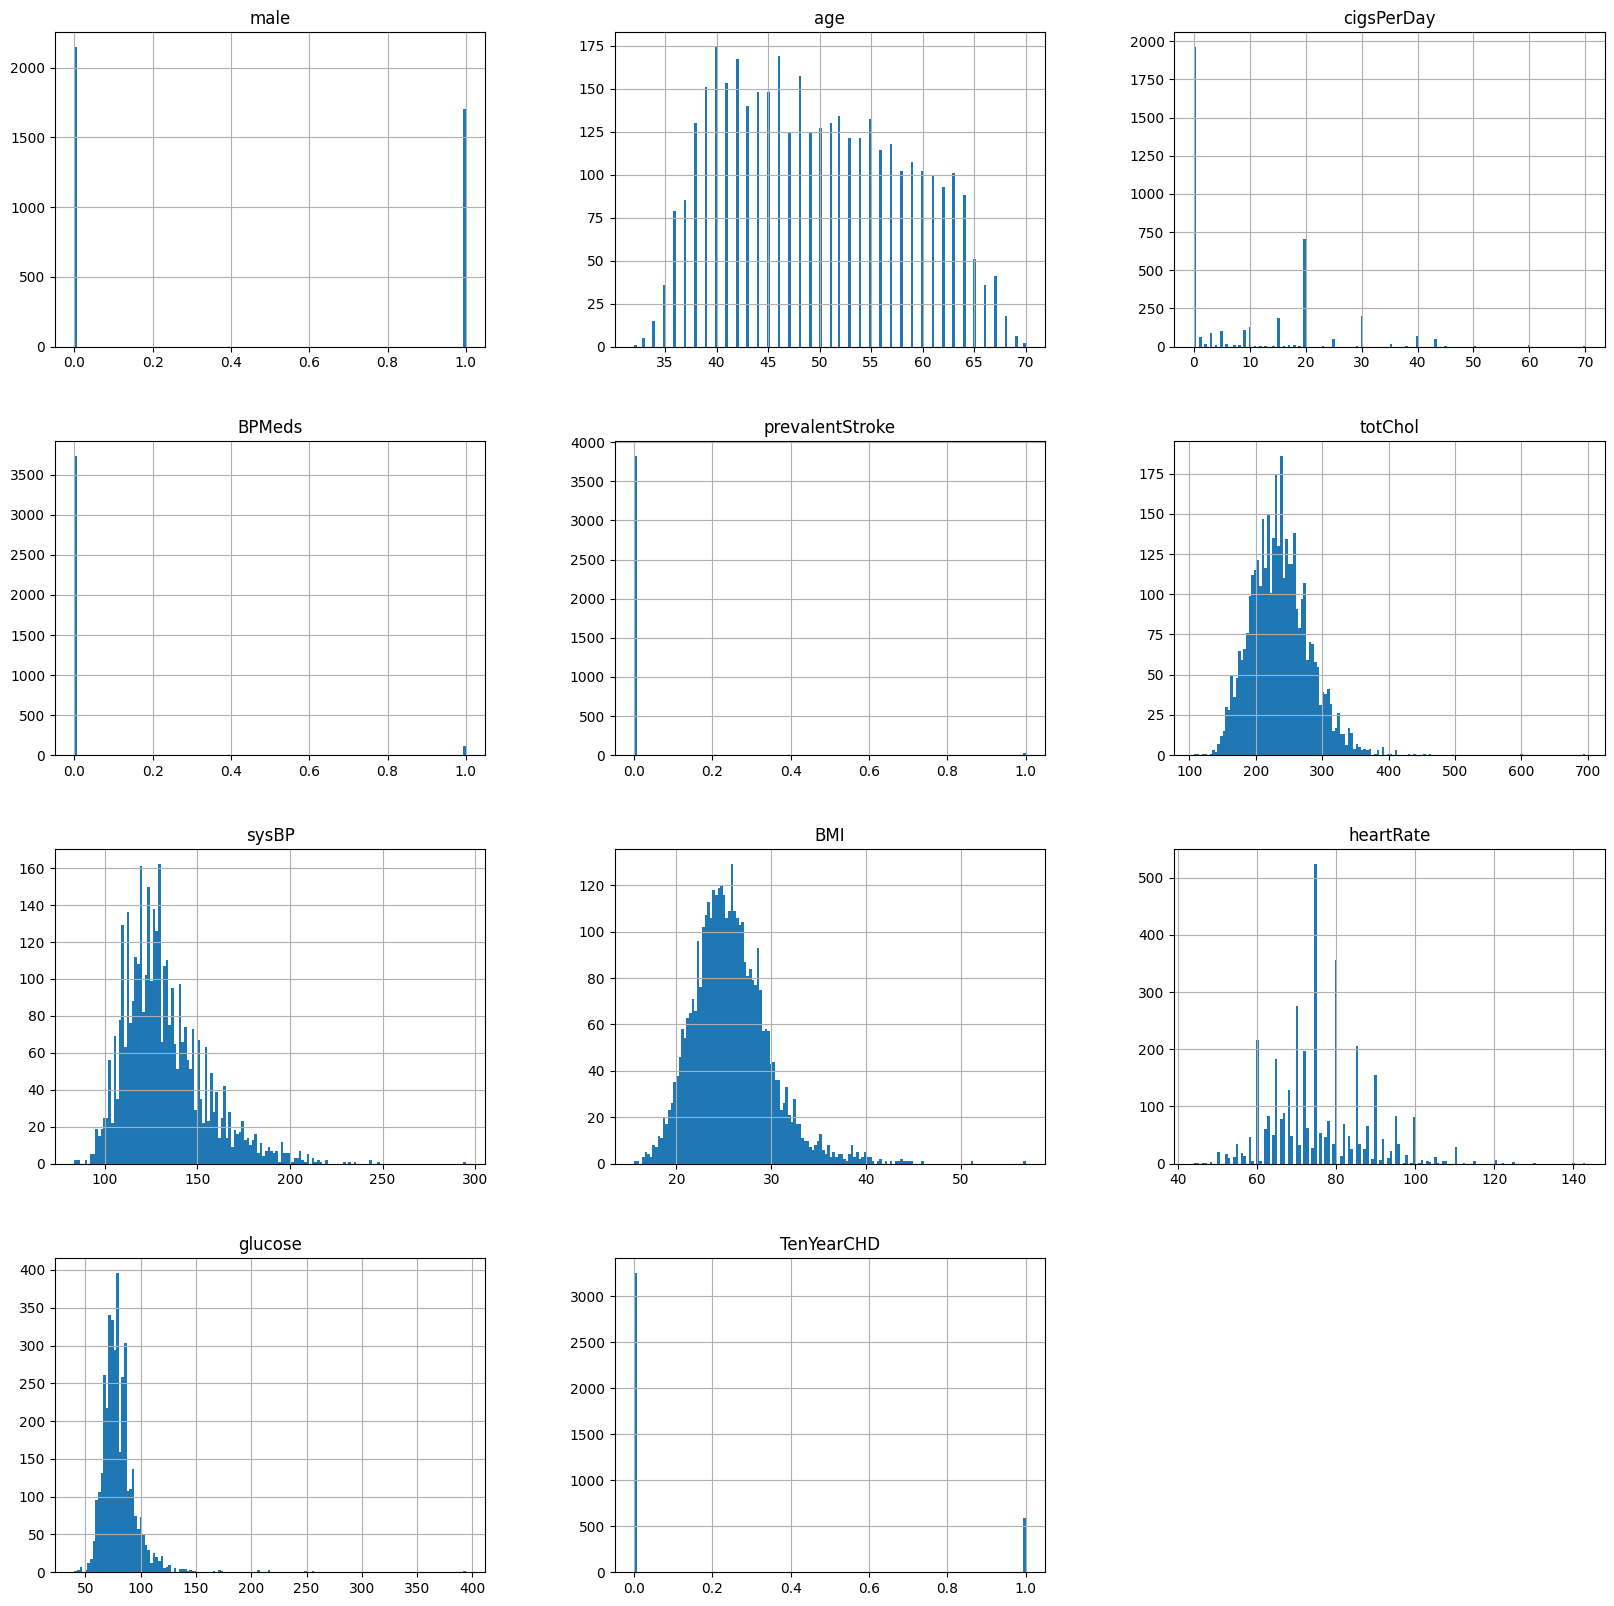

In [ ]:
# 각 열에 대한 도수 분포표를 보고 이상치 제거하자.
df_cleaned2.hist(figsize=(20,20),bins = 150)

df_cleaned2 = df_cleaned2[df_cleaned2['totChol'] <= 400]
df_cleaned2 = df_cleaned2[df_cleaned2['sysBP'] <= 220]
df_cleaned2 = df_cleaned2[df_cleaned2['BMI'] <= 40]
df_cleaned2 = df_cleaned2[df_cleaned2['heartRate'] <= 120]
df_cleaned2 = df_cleaned2[df_cleaned2['glucose'] <= 150]


array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'cigsPerDay'}>],
       [<Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'totChol'}>],
       [<Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>],
       [<Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>, <Axes: >]], dtype=object)

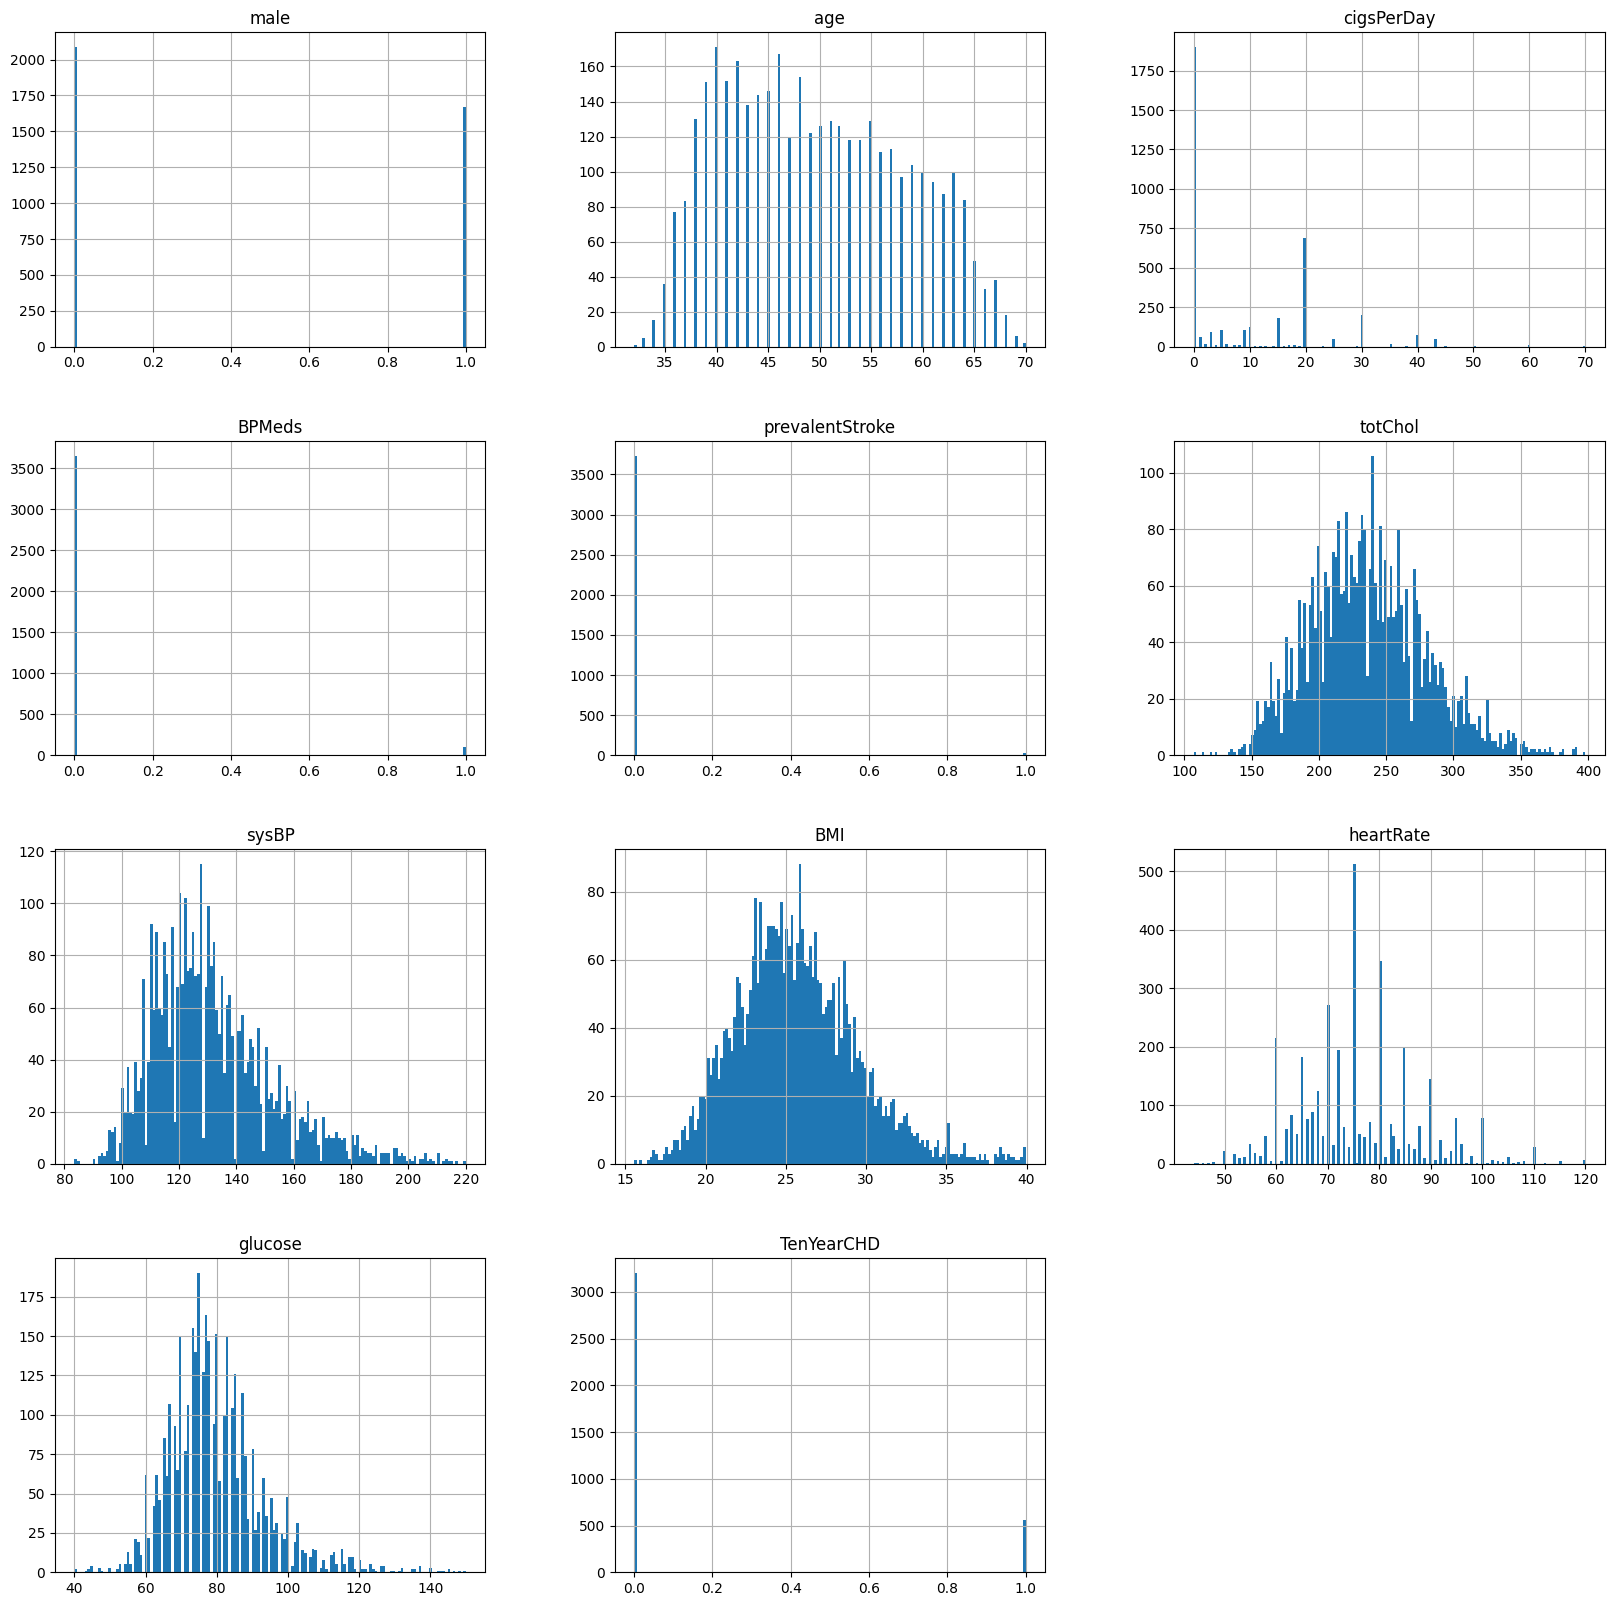

In [ ]:
df_cleaned2.hist(figsize=(20,20), bins = 150)

In [ ]:
# 과정 반복

# 데이터 전처리 이후 데이터 크기 확인
df_cleaned2.shape


(3755, 11)

In [ ]:
# 로지스틱 회귀를 통한 심근 경색 10년 발병 위험 여부 예측
# 심근 경색 10년 발병 위험 열을 제거후 y로 분리
# 분리후 데이터 확인
from sklearn.model_selection import train_test_split
X = df_cleaned2.drop(columns=["TenYearCHD"])
y=df_cleaned2.TenYearCHD
X

,male,age,cigsPerDay,BPMeds,prevalentStroke,totChol,sysBP,BMI,heartRate,glucose
0,1,39,0.0,0.0,0,195.0,106.0,26.97,80.0,77.0
1,0,46,0.0,0.0,0,250.0,121.0,28.73,95.0,76.0
2,1,48,20.0,0.0,0,245.0,127.5,25.34,75.0,70.0
3,0,61,30.0,0.0,0,225.0,150.0,28.58,65.0,103.0
4,0,46,23.0,0.0,0,285.0,130.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...
4232,1,68,0.0,0.0,0,176.0,168.0,23.14,60.0,79.0
4233,1,50,1.0,0.0,0,313.0,179.0,25.97,66.0,86.0
4234,1,51,43.0,0.0,0,207.0,126.5,19.71,65.0,68.0
4235,0,48,20.0,0.0,0,248.0,131.0,22.00,84.0,86.0


In [ ]:

# 훈련 집합, 테스트 집합 8:2 비율 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 각 변수들의 scale이 예측에 줄 영향을 줄이기 위해 Scaling
# 데이터를 평균을 0, 표준편차를 1로 변환하여 표준화된 데이터를 생성
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# 로지스틱 회귀 피팅
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)


LogisticRegression()

In [ ]:
# 파라미터 설정을 안해서 모델의 기본 임계값은 0.5
# 0.5가 넘는다면 1 아니라면 0
y_pred = logreg.predict(X_test_scaled)

np.set_printoptions(threshold=np.inf)
y_pred2 = logreg.predict_proba(X_test_scaled)
print(y_pred2)

np.set_printoptions(threshold=10000)


[[0.88449633 0.11550367]
 [0.87148075 0.12851925]
 [0.89304026 0.10695974]
 [0.86793868 0.13206132]
 [0.85434644 0.14565356]
 [0.96853482 0.03146518]
 [0.90478725 0.09521275]
 [0.88844705 0.11155295]
 [0.90103971 0.09896029]
 [0.97973307 0.02026693]
 [0.95239864 0.04760136]
 [0.95474661 0.04525339]
 [0.96813624 0.03186376]
 [0.96686179 0.03313821]
 [0.86247639 0.13752361]
 [0.87959302 0.12040698]
 [0.75086458 0.24913542]
 [0.69541647 0.30458353]
 [0.81481716 0.18518284]
 [0.9543533  0.0456467 ]
 [0.65047896 0.34952104]
 [0.90336458 0.09663542]
 [0.6898623  0.3101377 ]
 [0.79483871 0.20516129]
 [0.82215084 0.17784916]
 [0.85565248 0.14434752]
 [0.63334464 0.36665536]
 [0.73039781 0.26960219]
 [0.86573241 0.13426759]
 [0.87162823 0.12837177]
 [0.92030369 0.07969631]
 [0.91298036 0.08701964]
 [0.97202117 0.02797883]
 [0.81341715 0.18658285]
 [0.86622765 0.13377235]
 [0.95772768 0.04227232]
 [0.91396377 0.08603623]
 [0.86549804 0.13450196]
 [0.91389331 0.08610669]
 [0.81121243 0.18878757]


In [ ]:
# 임계값에 따라 결과 예측
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
# 예측 후 예측 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8521970705725699


In [ ]:
# prcision = TP / TP + FP  (모델이 True라고 분류한 것 중에서 실제 True인 것의 비율)
# (TP = 실제 True인 정답을 True 로 예측 )
# (FP = 실제 False인 정답을 True로 예측 )
# 예시 : 병에 걸렸고 병에 걸렸다고 말할 확률 / 병에 안걸렸는데 병에 걸렸다고 할 확률 + 병에 걸렸고 병에 걸렸다고 말할 확률

# Recall = TP / TP + FN (실제 True인 것 중에서 모델이 True라고 예측한 것의 비율)
# (TP = 실제 True인 정답을 True 로 예측 )
# (FN = 실제 True인 정답을 False 로 예측 )
# 예시 : 병에 걸렸고 병에 걸렸다고 말할 확률 / 병에 걸렸는데 병에 안걸렸다고 말할 확률 + 병에 걸렸고 병에 걸렸다고 말할 확률

from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

print(classification_report(y_test,y_pred))


# 이러한 검진같은 경우 recall이 중요한 지표
# 병에 걸렸는데 안걸렸다고 말하면 대형 사고 (1 일때의 recall)
# 0 안걸림 1 걸림

# 병이 안걸리는 것에 대해 재현률이 1로 높음
# 가장 중요한 지표인 1 일때의 재현률이 0.09로 작음.
# 1에 대한 precision은  0.77로 향상  그냥 찍었을때 맞출 확률이 0.5인것을 감안하면 예측을 하긴한다.


              precision    recall  f1-score   support

           0       0.85      1.00      0.92       634
           1       0.75      0.08      0.14       117

    accuracy                           0.85       751
   macro avg       0.80      0.54      0.53       751
weighted avg       0.84      0.85      0.80       751



In [ ]:

TenYearCHD = df['TenYearCHD']
filtered_cigs_per_day1 = cigs_per_day[TenYearCHD == 1]
filtered_cigs_per_day0 = cigs_per_day[TenYearCHD == 0]

In [ ]:

filtered_cigs_per_day1.size


644

In [ ]:

filtered_cigs_per_day0.size



3594

In [ ]:
from statsmodels.api import Logit
from statsmodels.tools import add_constant

X_train_scaled = add_constant(X_train_scaled)
X_test_scaled = add_constant(X_test_scaled)

logit_model = Logit(y_train, X_train_scaled)
result = logit_model.fit()

print(result.summary())




Optimization terminated successfully.
         Current function value: 0.369528
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3004
Model:                          Logit   Df Residuals:                     2993
Method:                           MLE   Df Model:                           10
Date:                Mon, 20 Nov 2023   Pseudo R-squ.:                  0.1091
Time:                        05:03:17   Log-Likelihood:                -1110.1
converged:                       True   LL-Null:                       -1246.0
Covariance Type:            nonrobust   LLR p-value:                 1.366e-52
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0331      0.063    -32.076      0.000      -2.157      -1.909
x1             0.2513      0.

In [ ]:
n_iterations = 10
sample_size = 644

balanced_datasets = []
trained_models = []  # 모델을 저장할 리스트

for _ in range(n_iterations):
    class_0 = df_cleaned2[df_cleaned2['TenYearCHD'] == 0]
    random_sample = class_0.sample(n=sample_size, random_state=42)
    class_1 = df_cleaned2[df_cleaned2['TenYearCHD'] == 1]
    balanced_df = pd.concat([class_1, random_sample])
    balanced_datasets.append(balanced_df)

for i, balanced_df in enumerate(balanced_datasets):
    X = balanced_df.drop(columns=["TenYearCHD"])
    y = balanced_df["TenYearCHD"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # 모델 학습 및 평가 등의 작업 수행
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # 로지스틱 회귀 피팅
    logreg = LogisticRegression()
    logreg.fit(X_train_scaled, y_train)
    trained_models.append(logreg)  # 학습된 모델 저장

# 누적된 모델 사용
y_pred_cumulative = []
for model in trained_models:
    y_pred = model.predict(X_test_scaled)
    y_pred_cumulative.append(y_pred)

# 예측 후 예측 정확도 계산
accuracy_cumulative = accuracy_score(y_test, np.mean(y_pred_cumulative, axis=0).round())
print("Accuracy (Cumulative):", accuracy_cumulative)

from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

print(classification_report(y_test, np.mean(y_pred_cumulative, axis=0).round()))

Accuracy (Cumulative): 0.65
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       125
           1       0.65      0.58      0.61       115

    accuracy                           0.65       240
   macro avg       0.65      0.65      0.65       240
weighted avg       0.65      0.65      0.65       240



In [ ]:
# 변수 소거법 시행
import warnings
from sklearn.linear_model import LogisticRegression
import sklearn.base
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report

selector = RFECV(estimator=logreg, step=1)
selector = selector.fit(X_train, y_train)

selector.support_


array([ True,  True,  True,  True,  True, False,  True,  True,  True,
       False])

In [ ]:
# 1일 때 precision 증가
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

logreg.fit(X_train_selected, y_train)
y_pred = logreg.predict(X_test_selected)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92       634
           1       0.78      0.06      0.11       117

    accuracy                           0.85       751
   macro avg       0.81      0.53      0.51       751
weighted avg       0.84      0.85      0.79       751



In [ ]:
from statsmodels.api import Logit
from statsmodels.tools import add_constant

X_train_scaled = add_constant(X_train_scaled)
X_test_scaled = add_constant(X_test_scaled)

logit_model = Logit(y_train, X_train_scaled)
result = logit_model.fit()

print(result.summary())



Optimization terminated successfully.
         Current function value: 0.369528
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3004
Model:                          Logit   Df Residuals:                     2993
Method:                           MLE   Df Model:                           10
Date:                Mon, 20 Nov 2023   Pseudo R-squ.:                  0.1091
Time:                        05:03:25   Log-Likelihood:                -1110.1
converged:                       True   LL-Null:                       -1246.0
Covariance Type:            nonrobust   LLR p-value:                 1.366e-52
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0331      0.063    -32.076      0.000      -2.157      -1.909
x1             0.2513      0.

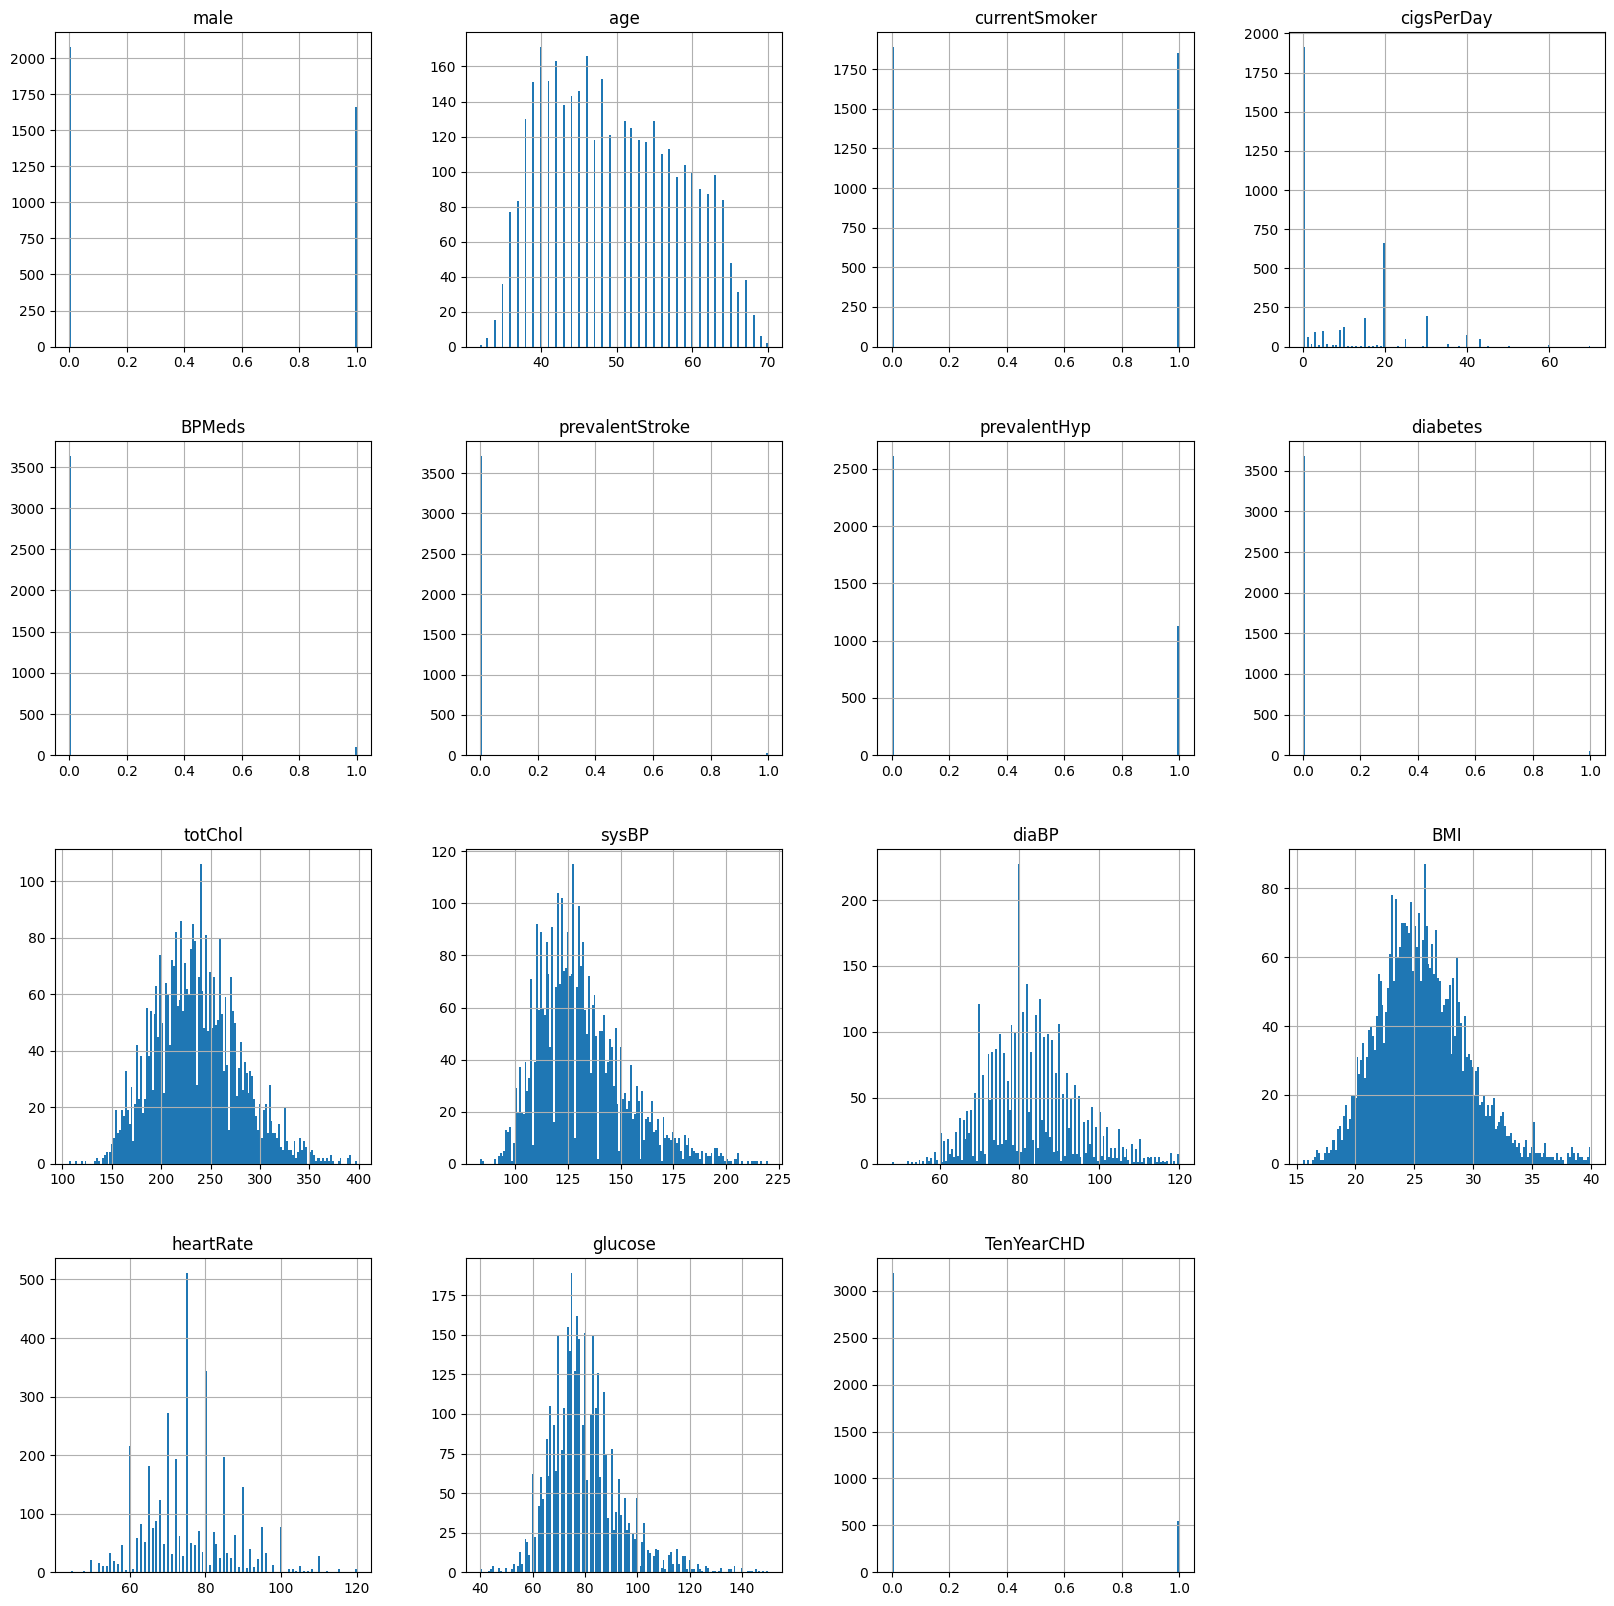

In [ ]:
# 다중 공산성 제거 전 특징들을 바탕으로 변수선택 기법 시행

# 각 열에 대한 도수 분포표를 보고 이상치 제거하자.
df_cleaned.hist(figsize=(20,20),bins = 150)

df_cleaned = df_cleaned[df_cleaned['totChol'] <= 400]
df_cleaned = df_cleaned[df_cleaned['sysBP'] <= 220]
df_cleaned = df_cleaned[df_cleaned['diaBP'] <=120]
df_cleaned = df_cleaned[df_cleaned['BMI'] <= 40]
df_cleaned = df_cleaned[df_cleaned['heartRate'] <= 120]
df_cleaned = df_cleaned[df_cleaned['glucose'] <= 150]



In [ ]:
# 로지스틱 회귀를 통한 심근 경색 10년 발병 위험 여부 예측
# 심근 경색 10년 발병 위험 열을 제거후 y로 분리
# 분리후 데이터 확인
from sklearn.model_selection import train_test_split
X = df_cleaned.drop(columns=["TenYearCHD"])
y=df_cleaned.TenYearCHD
X


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,1,68,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0
4235,0,48,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0


In [ ]:

# 훈련 집합, 테스트 집합 8:2 비율 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# 각 변수들의 scale이 예측에 줄 영향을 줄이기 위해 Scaling
# 데이터를 평균을 0, 표준편차를 1로 변환하여 표준화된 데이터를 생성
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:

# 로지스틱 회귀 피팅
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)



LogisticRegression()

In [ ]:
# 파라미터 선택하기
import warnings
from sklearn.linear_model import LogisticRegression
import sklearn.base
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report

selector = RFECV(estimator=logreg, step=1)
selector = selector.fit(X_train, y_train)

selector.support_


array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True])

In [ ]:
# 다중 공산성을 제거하기 전보다 확연히 낮아짐
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

logreg.fit(X_train_selected, y_train)

y_pred = logreg.predict(X_test_selected)

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.84      0.99      0.91       629
           1       0.38      0.03      0.05       119

    accuracy                           0.84       748
   macro avg       0.61      0.51      0.48       748
weighted avg       0.77      0.84      0.77       748

